In [4]:
import mne
import numpy as np
import torch

ModuleNotFoundError: No module named 'torch'

In [ ]:
raw = mne.io.read_raw_edf("data\chb01_01 (1).edf")


In [ ]:
fig = raw.compute_psd(tmax=np.inf, fmax=128)
fig.plot(
    average=True, picks="data", exclude="bads")

In [ ]:
#
raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False)

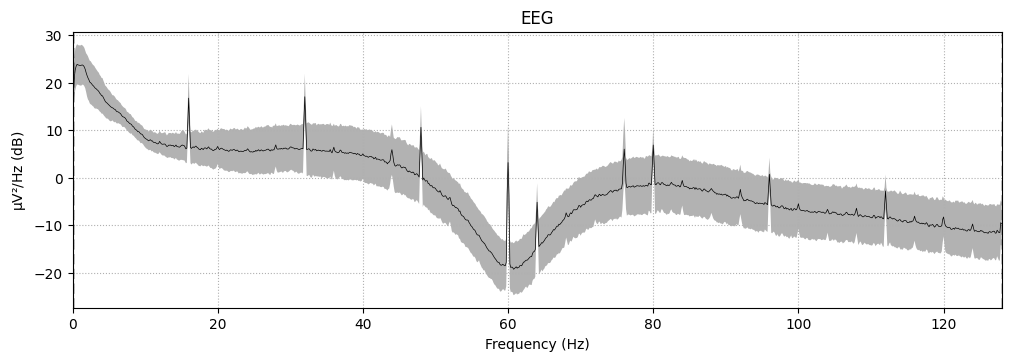

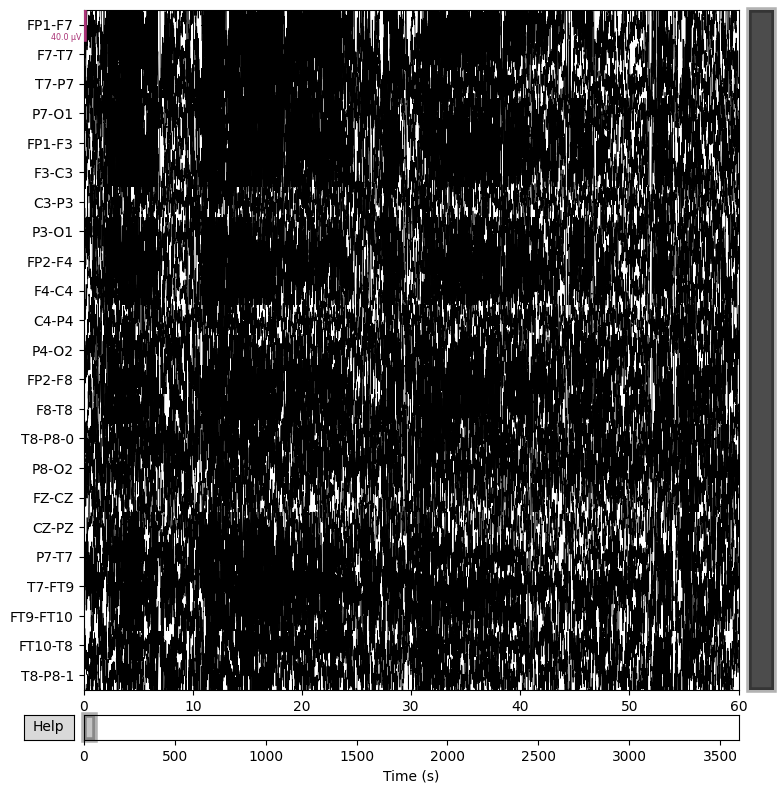

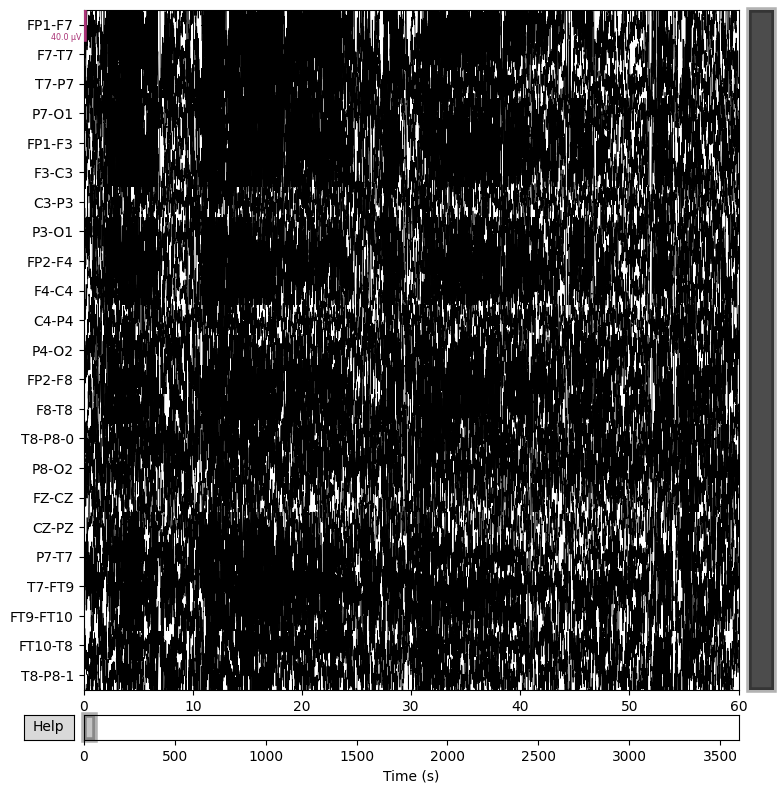

In [ ]:
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )


raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False)

In [ ]:
print(raw.info)
raw.load_data()


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


Measurement date,"November 06, 2076 11:42:54 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [ ]:
#filtering 60 hz out with notch filtering

#original problem is that we dont have meg stuff so we need to change "meg=true" to smth else
#so i did this shit
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)


freqs = (60, 120)
raw_notch = raw.copy().notch_filter(freqs=freqs, picks=eeg_picks)



In [3]:
for title, data in zip(["Un", "Notch "], [raw, raw_notch]):
    title="Filter with notch"
    fig = data.compute_psd(fmax=128).plot(average=True, picks="data", exclude="bads")
    fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
    

NameError: name 'raw' is not defined

In [29]:
fig.savefig("Uddhavs Attempt at filtering")

